# ML Pipeline

### Packages

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import itertools

# Preprocessing

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Models
## Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Classfication
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


# Evaluation

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve

In [19]:
def num_pipeline_transformer(data):
    
    '''
    
    Funktion zur Verarbeitung von numerischen Features
    Argument:
    vollständiges Dataset
    Returns: numerische Features, Funktionen für numerische Pipeline
        
        
    '''
    
    numerics = ['float64', 'int64']
    num_attrs = data.select_dtypes(include = numerics ) # Dataframe das alle numerischen Features enthält
    num_pipeline = Pipeline([
        
        ('imputer', KNNImputer()),
        ('std_scaler', StandardScaler())  
        ])
    return num_attrs, num_pipeline

def cat_pipeline_transformer(data):
    
    '''

    Funktion zur Verarbeitung von kategorialen Features
    Argument:
        vollständiges Dataset
    Returns:


    '''
    
    categorials = ['object', 'bool']
    
    cat_attrs = data.select_dtypes(include = categorials) # Dataframe das alle kategorialen/boolschen Features enthält
    cat_pipeline = Pipeline([
        ('encoding', OneHotEncoder())
    ])
    return cat_attrs, cat_pipeline

def pipeline_transformer(data):
    
    '''
    Komplette Pipeline zum Preprocessing aller Datentypen

    Argument:
        vollständiges Dataset
    Returns:
        vorbereiteten Daten


    '''


    num_attrs, num_pipeline = num_pipeline_transformer(data)
    cat_attrs, cat_pipeline = cat_pipeline_transformer(data)

    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, list(num_attrs))
        ,('cat', cat_pipeline, list(cat_attrs))

    ])
    
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [32]:
#The code for the below matrix is taken from sklearn documentation
#Defining the confusion matrix function
def plot_confusion_matrix(cm, classes = ['Success','Failed'],
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() - (cm.max()-cm.min())/ 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('Reality')
    plt.xlabel('Prediction')

### Einladen der Daten

In [2]:
df = pd.read_csv("./data/churn.csv")

## Preprocessing I

In [4]:
df['Churn'] = df['Churn'].astype('int64')

## Feature Selection

In [6]:
df = df.drop(["State", "Account length", "Area code"], axis = 1)

## Split des DataSets

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(df, df[["Churn", "International plan"]]): # Stratifizierung nach Target
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [16]:
data_pipe = strat_train_set.drop(["Churn"], axis = 1) # Features

In [17]:
data_labels = strat_train_set["Churn"].copy() # Target

## Preprocessing II

In [20]:
prepared_data = pipeline_transformer(data_pipe)

In [24]:
pd.DataFrame(prepared_data).describe()

0             1             2             3             4   \
count  2.666000e+03  2.666000e+03  2.666000e+03  2.666000e+03  2.666000e+03   
mean  -3.218231e-16 -3.296521e-16  3.203239e-16 -1.880633e-16  5.414732e-16   
std    1.000188e+00  1.000188e+00  1.000188e+00  1.000188e+00  1.000188e+00   
min   -5.809959e-01 -3.324838e+00 -4.943413e+00 -3.324908e+00 -3.938689e+00   
25%   -5.809959e-01 -6.525657e-01 -6.688746e-01 -6.524116e-01 -6.903437e-01   
50%   -5.809959e-01 -9.480703e-03  1.898222e-02 -9.597261e-03  2.574218e-02   
75%    7.513577e-01  6.683031e-01  6.577064e-01  6.685964e-01  6.766848e-01   
max    3.119986e+00  3.167082e+00  3.163471e+00  3.167462e+00  3.186904e+00   

                 5             6             7             8             9   \
count  2.666000e+03  2.666000e+03  2.666000e+03  2.666000e+03  2.666000e+03   
mean   2.825114e-16 -3.521398e-16  1.557685e-16 -2.846768e-16 -8.259002e-17   
std    1.000188e+00  1.000188e+00  1.000188e+00  1.000188e+00  1.000188e+00   
min   -4.994506e+00 -3.938761e+00 -3.561201e+00 -3.419243e+00 -3.562936e+00   
25%   -6.475248e-01 -6.910844e-01 -6.749856e-01 -6.770523e-01 -6.739443e-01   
50%    2.024101e-03  2.575563e-02 -4.868991e-04  3.388595e-02 -1.621303e-03   
75%    6.515730e-01  6.774807e-01  6.765081e-01  6.940429e-01  6.751395e-01   
max    3.499595e+00  3.185844e+00  3.863777e+00  3.334671e+00  3.861462e+00   

                 10            11            12            13           14  \
count  2.666000e+03  2.666000e+03  2.666000e+03  2.666000e+03  2666.000000   
mean  -5.402863e-16  1.129587e-16 -1.886047e-16 -8.511987e-17     0.903226   
std    1.000188e+00  1.000188e+00  1.000188e+00  1.000188e+00     0.295706   
min   -3.720015e+00 -1.801674e+00 -3.720736e+00 -1.192385e+00     0.000000   
25%   -6.466301e-01 -5.961367e-01 -6.406006e-01 -4.300592e-01     1.000000   
50%    4.204357e-03 -1.942908e-01  2.210215e-03 -4.300592e-01     1.000000   
75%    6.550388e-01  6.094009e-01  6.584130e-01  3.322665e-01     1.000000   
max    3.113747e+00  6.235243e+00  3.109129e+00  5.668546e+00     1.000000   

                15           16           17  
count  2666.000000  2666.000000  2666.000000  
mean      0.096774     0.730308     0.269692  
std       0.295706     0.443883     0.443883  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     1.000000     0.000000  
75%       0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

## Modellerstellung

### Training des Modells

#### Logistische Regression

In [26]:
log_reg = LogisticRegression()
log_reg.fit(prepared_data, data_labels)

LogisticRegression()

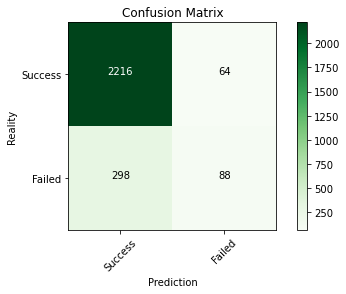

In [41]:
y_pred = log_reg.predict(prepared_data)
cm = confusion_matrix(data_labels, y_pred)
plot_confusion_matrix(cm)

In [43]:
print ("Accuracy of LogReg: %2.2f" % accuracy_score(data_labels, y_pred))

Accuracy of LogReg: 0.86


#### Entscheidungsbaum 

In [57]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(prepared_data, data_labels)

DecisionTreeClassifier(max_depth=5)

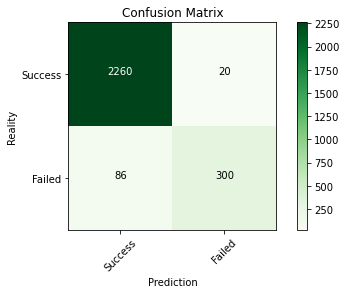

In [58]:
y_pred = tree.predict(prepared_data)
cm = confusion_matrix(data_labels, y_pred)
plot_confusion_matrix(cm)

In [45]:
print ("Accuracy of LogReg: %2.2f" % accuracy_score(data_labels, y_pred))

Accuracy of LogReg: 1.00


#### Random Forest

In [30]:
forest = RandomForestClassifier()
forest.fit(prepared_data, data_labels)

RandomForestClassifier()

## Evaluation

In [46]:
test_data = strat_test_set.drop("Churn", axis=1)
test_labels = strat_test_set["Churn"].copy()

In [47]:
test_data = pipeline_transformer(test_data)

### Logistische Regression

Accuracy of LogReg: 0.85


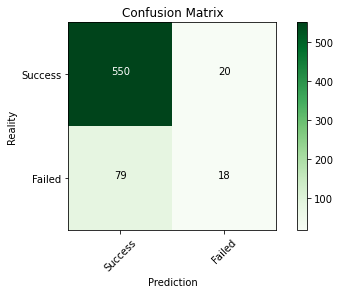

In [50]:
y_pred = log_reg.predict(test_data)
cm = confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(cm)
print ("Accuracy of LogReg: %2.2f" % accuracy_score(test_labels, y_pred))

### Entscheidungsbaum

Accuracy of DT: 0.91


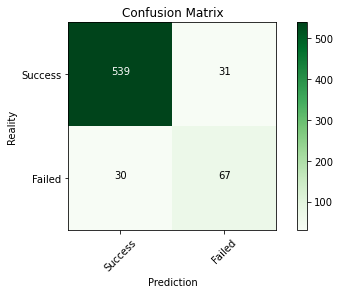

In [53]:
y_pred = tree.predict(test_data)
cm = confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(cm)
print ("Accuracy of DT: %2.2f" % accuracy_score(test_labels, y_pred))

In [ ]:
plot_tree(tree) # https://mljar.com/blog/visualize-decision-tree/

### Random Forest

Accuracy of RF: 0.94


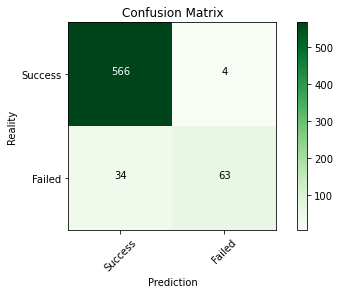

In [52]:
y_pred = forest.predict(test_data)
cm = confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(cm)
print ("Accuracy of RF: %2.2f" % accuracy_score(test_labels, y_pred))